Formato: (500, 5)

Tipos de dados:
timestamp               datetime64[ns]
cpu_usage_percent              float64
memory_usage_percent           float64
latency_ms                     float64
requests_per_sec               float64
dtype: object

Resumo estatístico:
       cpu_usage_percent  memory_usage_percent  latency_ms  requests_per_sec
count         500.000000            500.000000  500.000000        500.000000
mean           60.053016             70.318261  205.424226        120.995638
std            14.559063              9.779972   50.512317         29.521984
min            11.380990             43.031134   55.187231         31.788341
25%            49.495389             64.047083  169.878519        101.641915
50%            60.191957             70.285316  205.990292        119.732599
75%            69.551749             76.512423  237.736918        140.993082
max           100.000000             96.323821  330.084156        215.793227

Valores nulos por coluna:
timestamp      

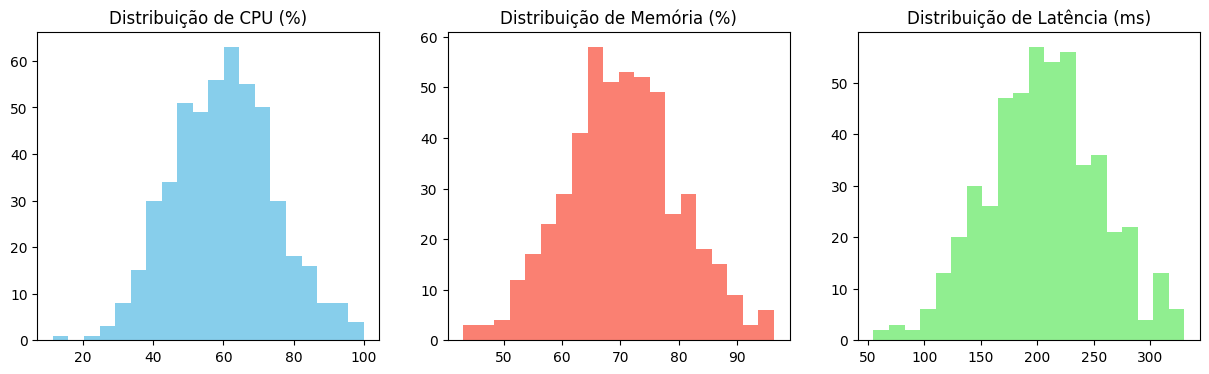

/root/.ipykernel/3321/command-6140515531175097-3533030764:67: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


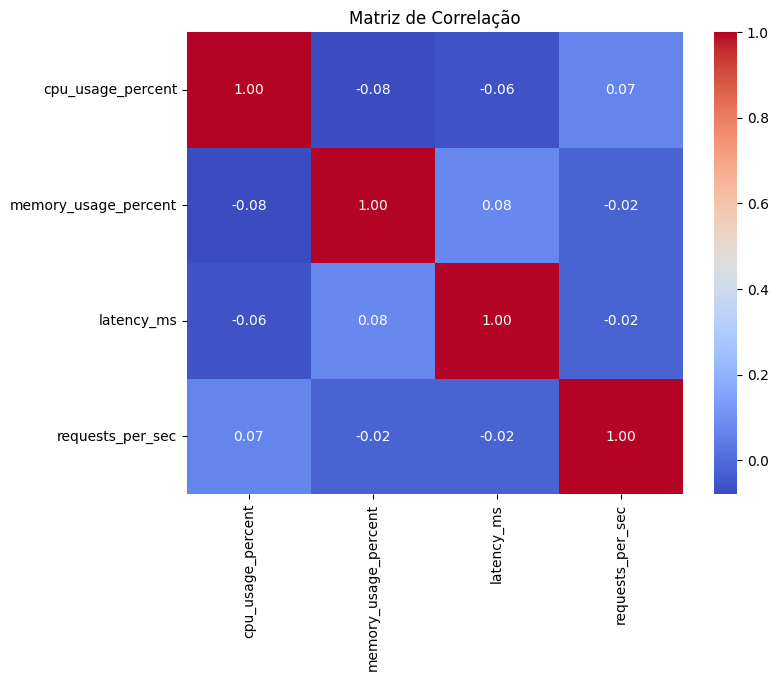

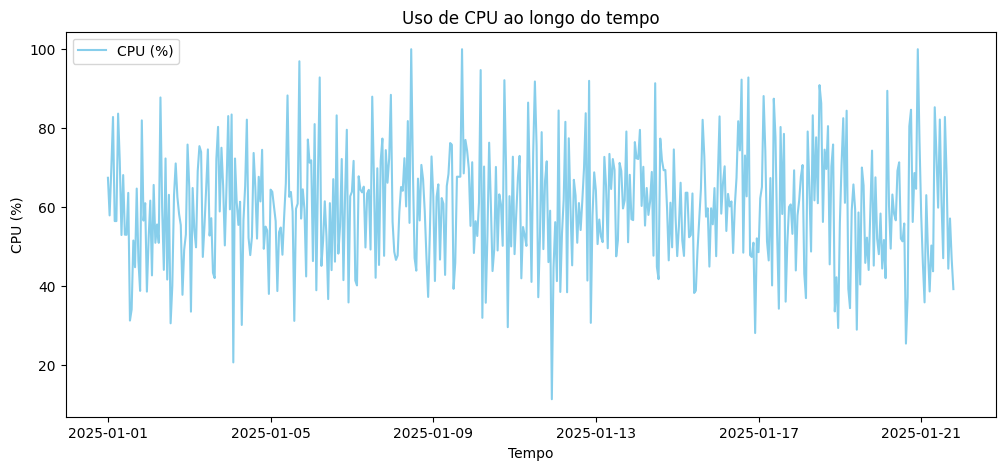

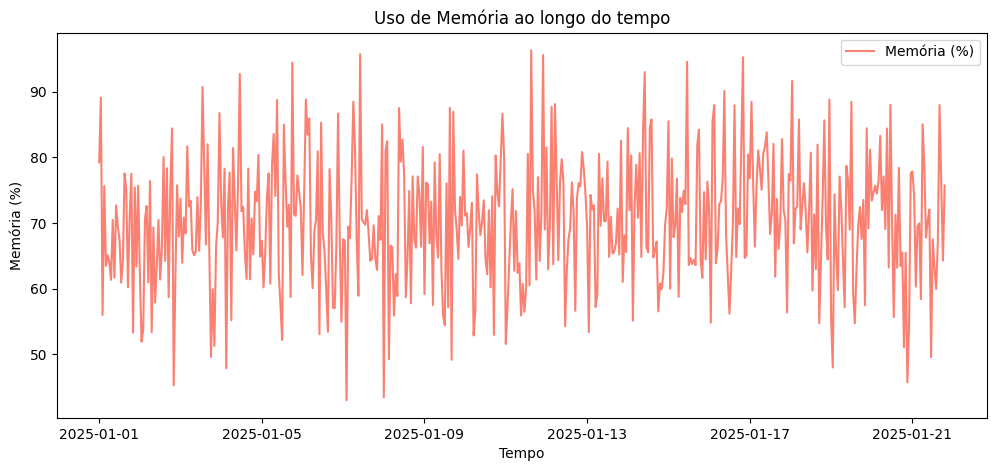

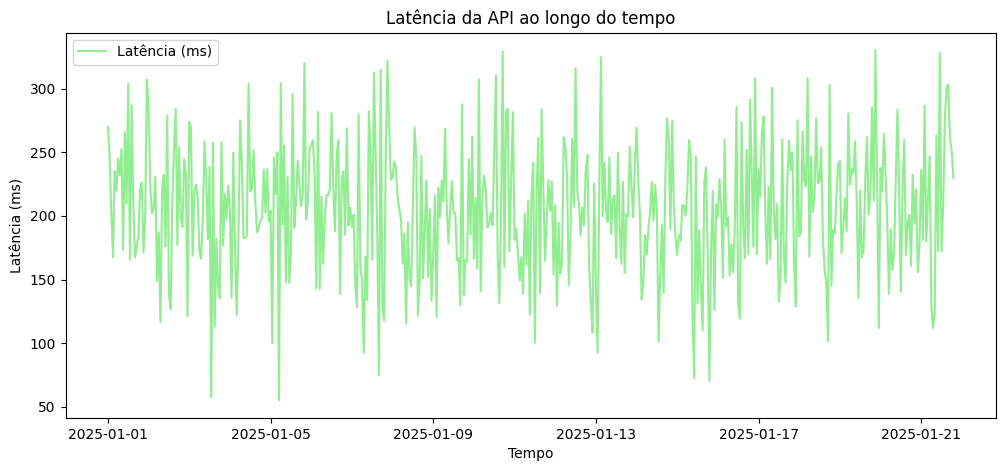

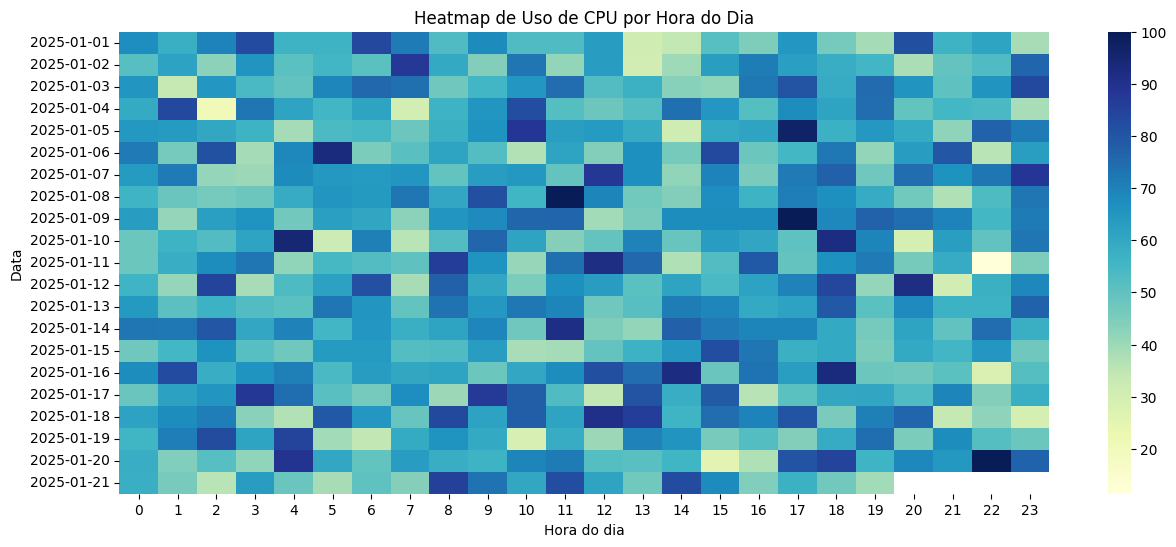

Número de alertas de CPU > 85%: 23
Número de alertas de Memória > 90%: 11
Número de alertas de Latência > 300ms: 21


In [0]:
# -*- coding: utf-8 -*-
# Databricks notebook source
# MAGIC %md
# MAGIC # Análise de Consumo de Recursos em Infraestrutura/API
# MAGIC 
# MAGIC **Objetivo:** Identificar padrões de consumo de CPU, memória e latência em uma infraestrutura simulada (ou API) para antecipar gargalos e criar alertas preventivos.  
# MAGIC 
# MAGIC **Pergunta principal:** Quais padrões de consumo de recursos (CPU, memória, rede/latência) podem antecipar gargalos em nossa infraestrutura?

# COMMAND ----------
# MAGIC %md
# MAGIC ## Bloco 1 — Exploração Inicial

# COMMAND ----------
import pandas as pd

# Carregar o dataset (ajuste o caminho para seu Databricks)
df_spark = spark.table("default.simulated_infra_api_metrics")
df = df_spark.toPandas()

# Converter timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Dimensões do dataset
print("Formato:", df.shape)

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Estatísticas descritivas
print("\nResumo estatístico:")
print(df.describe())

# Valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# COMMAND ----------
# MAGIC %md
# MAGIC ## Bloco 2 — Distribuição das Métricas
#CPU → uso de processamento
#Memória → uso de RAM
#Latência → “performance da rede/API”
# COMMAND ----------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(df['cpu_usage_percent'], bins=20, color='skyblue')
axs[0].set_title("Distribuição de CPU (%)")

axs[1].hist(df['memory_usage_percent'], bins=20, color='salmon')
axs[1].set_title("Distribuição de Memória (%)")

axs[2].hist(df['latency_ms'], bins=20, color='lightgreen')
axs[2].set_title("Distribuição de Latência (ms)")

plt.show()

# COMMAND ----------
# MAGIC %md
# MAGIC ## Bloco 3 — Correlações
#Entendimento do dataset.
#Distribuição das métricas.
#Relações entre elas.
# COMMAND ----------
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# COMMAND ----------
# MAGIC %md
# MAGIC ## Bloco 4 — Séries Temporais
#Análise por hora do dia / dia da semana → identificar horários críticos.
#Heatmap para visualização de padrões de CPU/memória/latência.
#Correlação temporal → ver se picos de CPU ou memória precedem picos de latência.
#Alertas simulados → criar regras simples (CPU > 85%, memória > 90%) e contar quantos eventos críticos ocorreriam.
# COMMAND ----------
# CPU ao longo do tempo
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['cpu_usage_percent'], label='CPU (%)', color='skyblue')
plt.title("Uso de CPU ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("CPU (%)")
plt.legend()
plt.show()

# Memória ao longo do tempo
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['memory_usage_percent'], label='Memória (%)', color='salmon')
plt.title("Uso de Memória ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("Memória (%)")
plt.legend()
plt.show()

# Latência ao longo do tempo
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['latency_ms'], label='Latência (ms)', color='lightgreen')
plt.title("Latência da API ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("Latência (ms)")
plt.legend()
plt.show()

# COMMAND ----------
# MAGIC %md
# MAGIC ## Bloco 5 — Heatmap de Horários Críticos e Alertas
#Visualizar picos horários da infraestrutura/API.
#Quantificar eventos críticos que precisariam de ação preventiva.
#transformar dados em alertas operacionais.
# COMMAND ----------
# Extrair hora e dia
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.date

# Heatmap de CPU
pivot_cpu = df.pivot_table(values="cpu_usage_percent", index="day", columns="hour", aggfunc="mean")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_cpu, cmap="YlGnBu")
plt.title("Heatmap de Uso de CPU por Hora do Dia")
plt.xlabel("Hora do dia")
plt.ylabel("Data")
plt.show()

# Simular alertas críticos
alert_cpu = df[df['cpu_usage_percent'] > 85]
alert_memory = df[df['memory_usage_percent'] > 90]
alert_latency = df[df['latency_ms'] > 300]

print(f"Número de alertas de CPU > 85%: {len(alert_cpu)}")
print(f"Número de alertas de Memória > 90%: {len(alert_memory)}")
print(f"Número de alertas de Latência > 300ms: {len(alert_latency)}")

# COMMAND ----------
# MAGIC %md
# MAGIC ## Conclusão / Insights
# MAGIC 
# MAGIC - Identificamos padrões de uso de CPU e memória em horários críticos.  
# MAGIC - Correlação mostra que picos de CPU impactam latência.  
# MAGIC - Alertas simulados indicam quando a infraestrutura/API está próxima de atingir limites críticos.  
# MAGIC - Próximos passos: usar esses insights para criar alertas automáticos e planejamento de capacidade.

import matplotlib.pyplot as plt

# salvar imagem CPU ao longo do tempo
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['cpu_usage_percent'], label='CPU (%)', color='skyblue')
plt.title("Uso de CPU ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("CPU (%)")
plt.legend()
plt.savefig("/dbfs/FileStore/tables/cpu_time_series.png")  # salva imagem
plt.show()

import seaborn as sns

plt.figure(figsize=(15,6))
sns.heatmap(pivot_cpu, cmap="YlGnBu")
plt.title("Heatmap de Uso de CPU por Hora do Dia")
plt.savefig("/dbfs/FileStore/tables/heatmap_cpu.png")
plt.show()


